In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [16]:
"""
df_01 = pd.read_csv("../Resources/ArtistWeek.csv")
print(df_01.info())
df_01
"""

'\ndf_01 = pd.read_csv("../Resources/ArtistWeek.csv")\nprint(df_01.info())\ndf_01\n'

In [17]:
"""
genres_lists = df_01["Genres"].str.split(",")
genres_lists

unique_genres_list = []

for each_list in genres_lists:
    for each_genre in each_list:
        if not each_genre in unique_genres_list:
            unique_genres_list.append(each_genre)

unique_genres_list
"""


'\ngenres_lists = df_01["Genres"].str.split(",")\ngenres_lists\n\nunique_genres_list = []\n\nfor each_list in genres_lists:\n    for each_genre in each_list:\n        if not each_genre in unique_genres_list:\n            unique_genres_list.append(each_genre)\n\nunique_genres_list\n'

In [18]:
#pd.options.display.float_format = '{:.000f}'.format

In [19]:
df_01 = pd.read_csv("../Resources/artistDf.csv")
df_01 = df_01.dropna()
print(df_01.info())
df_01

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 1034
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   X               934 non-null    int64 
 1   Artist          934 non-null    object
 2   Followers       934 non-null    int64 
 3   Genres          934 non-null    object
 4   NumAlbums       934 non-null    int64 
 5   YearFirstAlbum  934 non-null    int64 
 6   Gender          934 non-null    object
 7   Group.Solo      934 non-null    object
dtypes: int64(4), object(4)
memory usage: 65.7+ KB
None


,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo
...,...,...,...,...,...,...,...,...
1028,1028,Mercedes Sosa,404861,"argentine rock,cantautor,folklore argentino,nu...",64,1962,F,Solo
1030,1030,Dwight Yoakam,284597,"country,country rock,nashville sound,outlaw co...",25,1985,M,Solo
1032,1032,Lila McCann,42444,"contemporary country,country,country dawn",4,1997,F,Solo
1033,1033,Everlast,200550,rap rock,11,1990,M,Solo


In [20]:
df_01["Followers"].describe()

count    9.340000e+02
mean     1.893986e+06
std      4.128050e+06
min      1.093000e+03
25%      2.100548e+05
50%      5.797685e+05
75%      1.681426e+06
max      5.269876e+07
Name: Followers, dtype: float64

In [21]:
df_01["is_popular"] = df_01["Followers"] > 500000
df_01["is_popular"].value_counts()

is_popular
True     508
False    426
Name: count, dtype: int64

In [22]:
df_01.columns

Index(['X', 'Artist', 'Followers', 'Genres', 'NumAlbums', 'YearFirstAlbum',
       'Gender', 'Group.Solo', 'is_popular'],
      dtype='object')

In [23]:
clean_df_01 = df_01.drop(columns = ["X","Artist","Genres", "Followers"])
clean_df_01 = pd.get_dummies(clean_df_01)
clean_df_01

,NumAlbums,YearFirstAlbum,is_popular,Gender_F,Gender_M,Group.Solo_Group,Group.Solo_Solo
0,8,2011,True,False,True,False,True
1,10,2009,True,False,True,False,True
2,10,2006,True,False,True,True,False
3,11,2010,True,False,True,False,True
4,6,2005,True,False,True,False,True
...,...,...,...,...,...,...,...
1028,64,1962,False,True,False,False,True
1030,25,1985,False,False,True,False,True
1032,4,1997,False,True,False,False,True
1033,11,1990,False,False,True,False,True


In [24]:
clean_df_01.corr()

,NumAlbums,YearFirstAlbum,is_popular,Gender_F,Gender_M,Group.Solo_Group,Group.Solo_Solo
NumAlbums,1.000000,-0.552031,0.127046,-0.121523,0.121523,-0.114632,0.114632
YearFirstAlbum,-0.552031,1.000000,-0.031771,0.007115,-0.007115,-0.013034,0.013034
is_popular,0.127046,-0.031771,1.000000,-0.107817,0.107817,0.093301,-0.093301
Gender_F,-0.121523,0.007115,-0.107817,1.000000,-1.000000,-0.225359,0.225359
Gender_M,0.121523,-0.007115,0.107817,-1.000000,1.000000,0.225359,-0.225359
Group.Solo_Group,-0.114632,-0.013034,0.093301,-0.225359,0.225359,1.000000,-1.000000
Group.Solo_Solo,0.114632,0.013034,-0.093301,0.225359,-0.225359,-1.000000,1.000000


In [25]:
X = clean_df_01.copy()
X.drop("is_popular", axis=1, inplace=True)
X.head()

,NumAlbums,YearFirstAlbum,Gender_F,Gender_M,Group.Solo_Group,Group.Solo_Solo
0,8,2011,False,True,False,True
1,10,2009,False,True,False,True
2,10,2006,False,True,True,False
3,11,2010,False,True,False,True
4,6,2005,False,True,False,True


In [26]:
y = clean_df_01["is_popular"].values.reshape(-1, 1)
y[:5]


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

c:\Users\Aspire-PC\anaconda3\envs\orange3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.29535082261763707


In [29]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.46991546660664907, 'YearFirstAlbum'),
 (0.3962189951336024, 'NumAlbums'),
 (0.03984338096594403, 'Gender_M'),
 (0.03740547875710532, 'Gender_F'),
 (0.028552153371392098, 'Group.Solo_Group'),
 (0.028064525165307094, 'Group.Solo_Solo')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

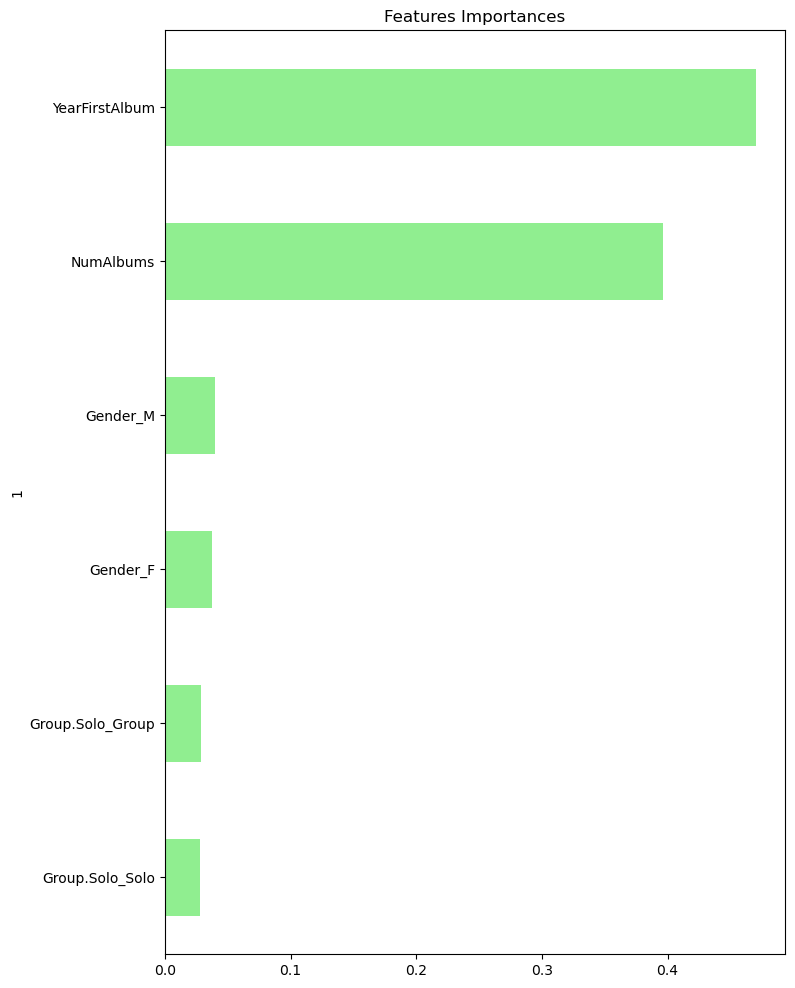

In [30]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)